In [1]:
# Import das Libs
import pandas as pd
import numpy as np
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

Pandas version: 2.3.3
Numpy version: 2.0.2


In [2]:
# Carregar o dataset
try:
    df = pd.read_csv('Country-data.csv')
    print("Dataset carregado com sucesso!")
    print("\nInformações iniciais do dataset:")
    print(df.head())
    print("\nTipos de dados e valores não nulos:")
    df.info()
except FileNotFoundError:
    print("Erro: O arquivo 'Country-data.csv' não foi encontrado. Certifique-se de que está na mesma pasta do notebook ou forneça o caminho correto.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o dataset: {e}")

Dataset carregado com sucesso!

Informações iniciais do dataset:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  

Tipos de dados e valores não nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cou

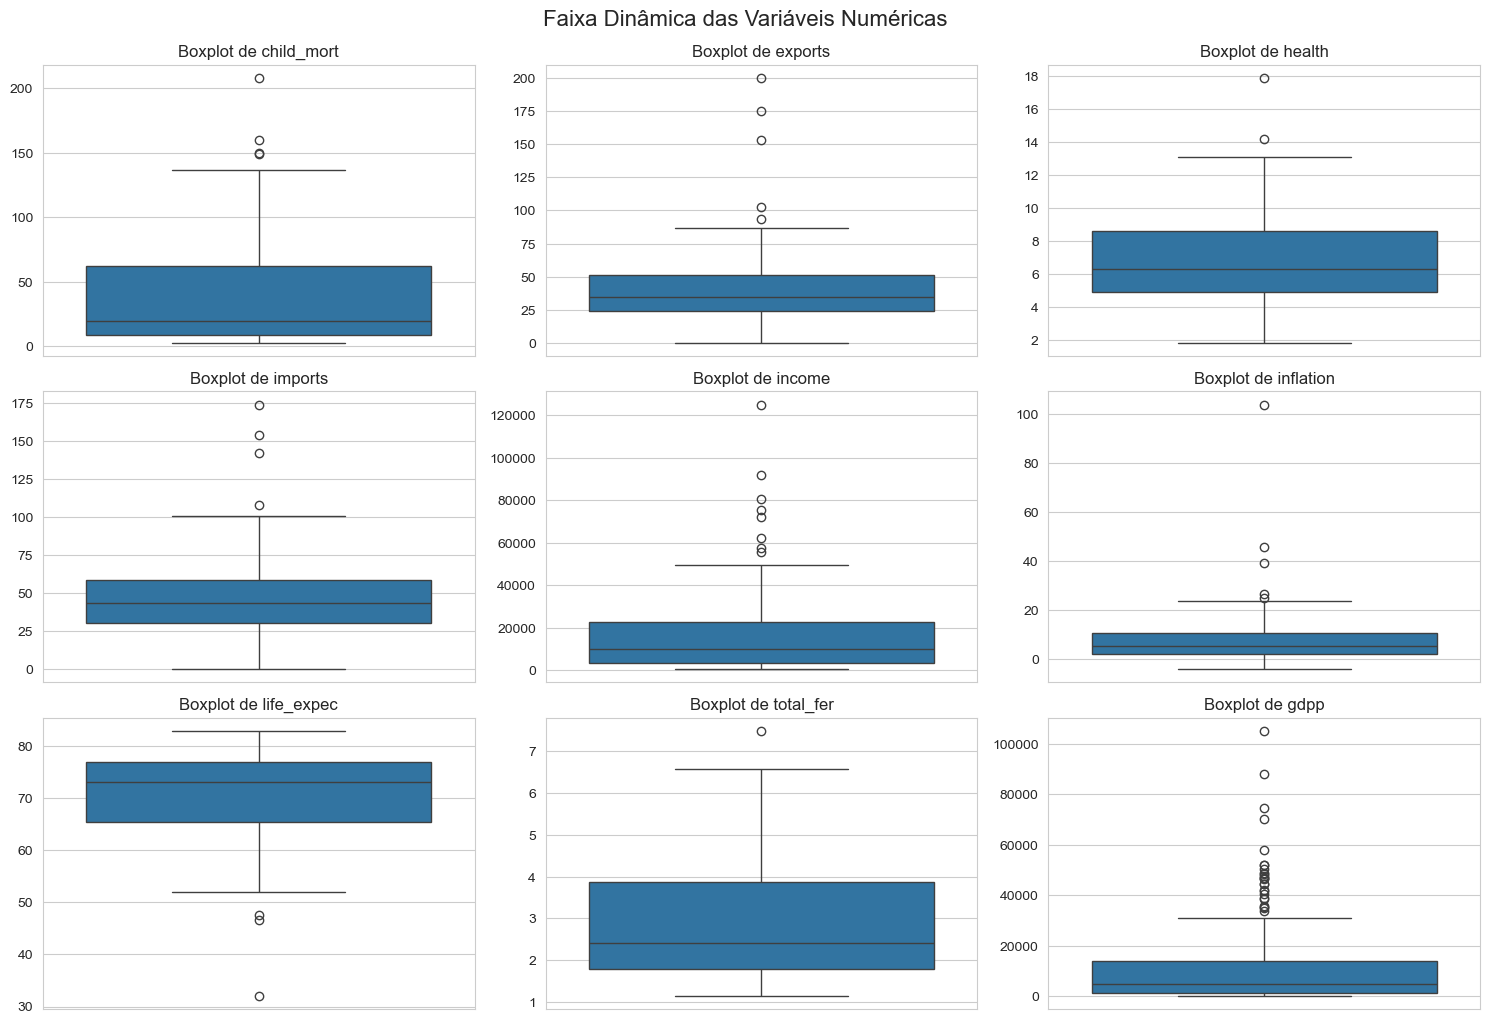


Estatísticas Descritivas das Variáveis Numéricas:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%  

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas as colunas numéricas para a visualização
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remover a coluna 'country' se ela tiver sido incluída por algum motivo
if 'country' in numeric_cols:
    numeric_cols.remove('country')

# Configurar o estilo dos gráficos
sns.set_style("whitegrid")

# Criar boxplots para cada variável numérica
plt.figure(figsize=(15, 10)) # Ajuste o tamanho da figura conforme necessário
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1) # Cria uma grade de 3x3 subplots
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel('') # Remove o rótulo do eixo y para evitar poluição visual

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.suptitle('Faixa Dinâmica das Variáveis Numéricas', y=1.02, fontsize=16) # Título geral
plt.show()

# Para uma visão mais detalhada da escala, podemos também ver as estatísticas descritivas
print("\nEstatísticas Descritivas das Variáveis Numéricas:")
print(df[numeric_cols].describe())

C:\Users\alexa\anaconda3\envs\projeto_clusterizacao\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



Dataset após transformação logarítmica (primeiras 5 linhas):
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    4.513055  2.397895  2.149434  3.826465  7.384610   2.345645        56.2   
1    2.867899  3.367296  2.021548  3.903991  9.203416   1.702928        76.3   
2    3.342862  3.673766  1.642873  3.478158  9.465060   2.839078        76.5   
3    4.787492  4.147885  1.348073  3.781914  8.682877   3.152736        60.1   
4    2.424803  3.839452  1.950187  4.092677  9.857496   0.891998        76.8   

   total_fer      gdpp  
0   1.919859  6.317165  
1   0.974560  8.316545  
2   1.358409  8.403128  
3   1.968510  8.169336  
4   1.141033  9.409273  

Dataset após padronização (primeiras 5 linhas):
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.278012 -1.764313  0.434646  0.147868 -1.413035   0.565707   -1.619092   
1   -0.239708 -0.283872  0.076480  0.291835  0.071660  -0.048485    0.647866   
2    0.198464  0.1

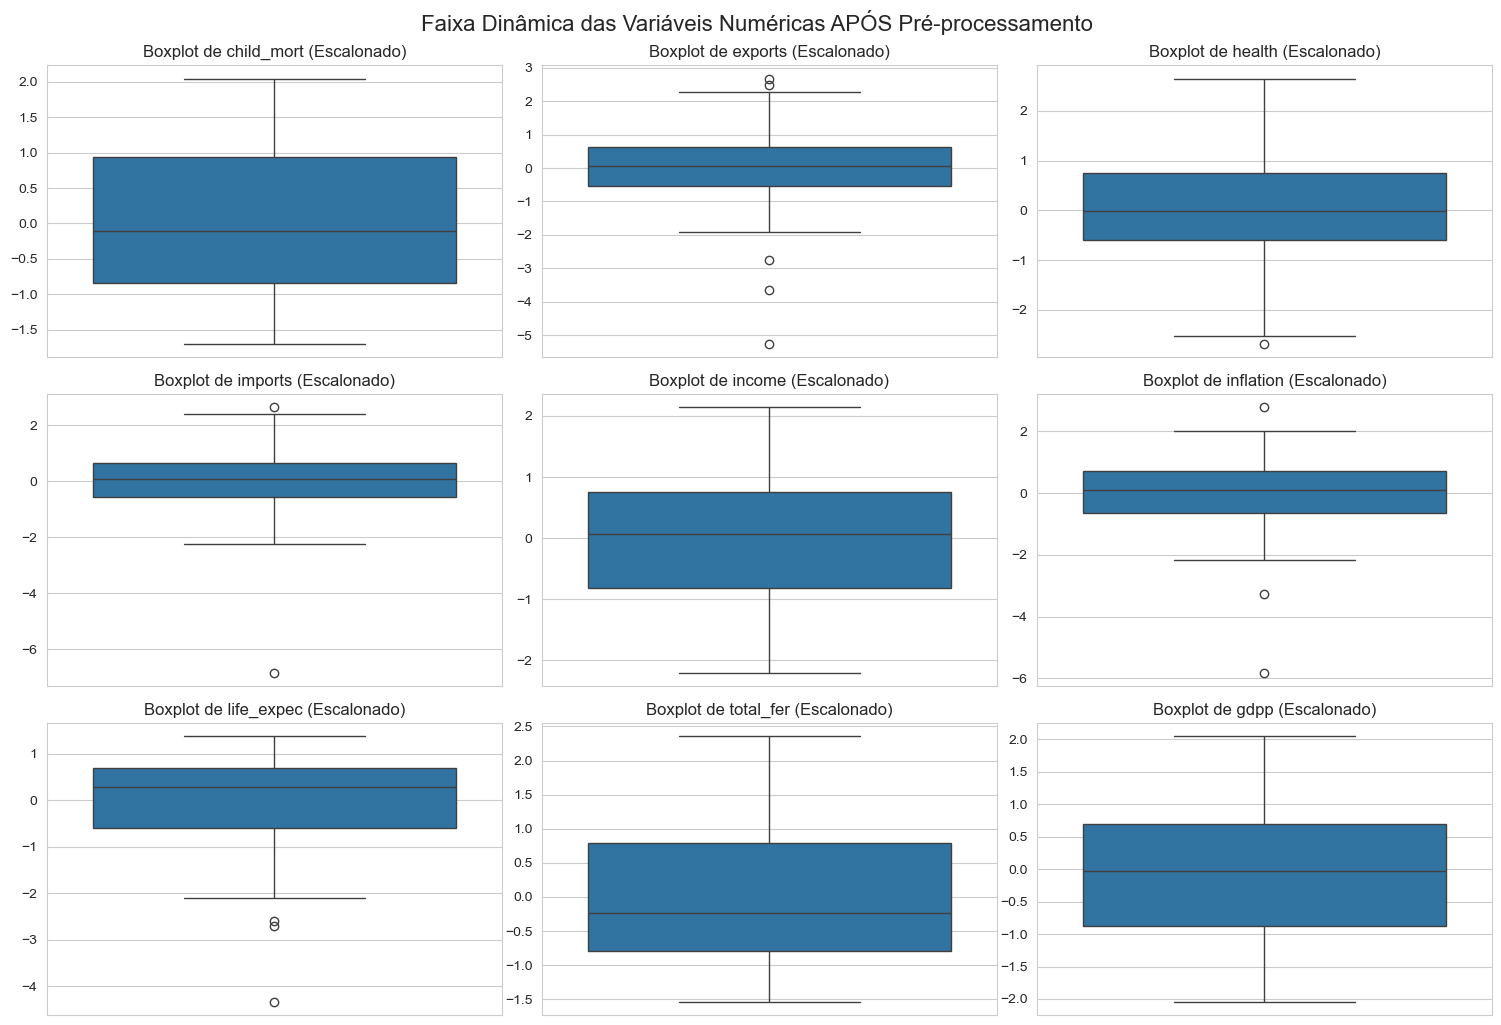

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Certificar que pandas está importado

# --- 1. Identificar e Separar Variáveis Numéricas e Categóricas ---
country_names = df['country']
df_numeric = df.drop('country', axis=1)

# --- 2. Aplicação da Transformação Logarítmica (np.log1p) ---
columns_to_log_transform = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'total_fer', 'gdpp']

# Criar uma cópia para não alterar o DataFrame original 'df_numeric' diretamente,
df_log_transformed = df_numeric.copy()

for col in columns_to_log_transform:
    # np.log1p(x) é equivalente a log(1+x), útil para lidar com zeros que log(x) não suporta
    df_log_transformed[col] = np.log1p(df_log_transformed[col])

print("\nDataset após transformação logarítmica (primeiras 5 linhas):")
print(df_log_transformed.head())

# --- 3. Aplicação da Padronização (StandardScaler) ---
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log_transformed)

# Converter o array numpy resultante de volta para um DataFrame para manter os nomes das colunas
df_scaled = pd.DataFrame(df_scaled, columns=df_log_transformed.columns)

print("\nDataset após padronização (primeiras 5 linhas):")
print(df_scaled.head())

# --- 4. Verificação Pós-Pré-processamento: Estatísticas Descritivas e Boxplots ---
print("\nEstatísticas Descritivas das Variáveis APÓS pré-processamento:")
print(df_scaled.describe())

# Gerar novos boxplots para visualizar o efeito do pré-processamento
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_scaled.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_scaled[col])
    plt.title(f'Boxplot de {col} (Escalonado)')
    plt.ylabel('')
plt.tight_layout()
plt.suptitle('Faixa Dinâmica das Variáveis Numéricas APÓS Pré-processamento', y=1.02, fontsize=16)
plt.show()

C:\Users\alexa\anaconda3\envs\projeto_clusterizacao\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\alexa\anaconda3\envs\projeto_clusterizacao\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\projeto_clusterizacao\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\projeto_clusterizacao\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows w

Foram removidas 4 linhas devido a valores NaN introduzidos pela transformação logarítmica (provavelmente 'inflation' <= -1).
Dataset agora tem 163 linhas após a limpeza.

Dataset após limpeza de NaN's e padronização (primeiras 5 linhas):
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.259696 -1.765376  0.441085  0.162132 -1.389979   0.565707   -1.596719   
1   -0.271612 -0.268457  0.082717  0.308548  0.096447  -0.048485    0.669790   
2    0.170483  0.204785 -0.978418 -0.495687  0.310276   1.037243    0.692343   
3    1.515141  0.936907 -1.804516  0.077992 -0.328966   1.336981   -1.156948   
4   -0.684045  0.460634 -0.117252  0.664904  0.630996  -0.823427    0.726171   

   total_fer      gdpp  
0   1.710754 -1.440849  
1  -0.962602 -0.095963  
2   0.122944 -0.037722  
3   1.848340 -0.194983  
4  -0.491807  0.639063  
Para n_clusters = 2, o Silhouette Score médio é: 0.3402
Para n_clusters = 3, o Silhouette Score médio é: 0.2552
Para n_clusters = 4

C:\Users\alexa\anaconda3\envs\projeto_clusterizacao\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


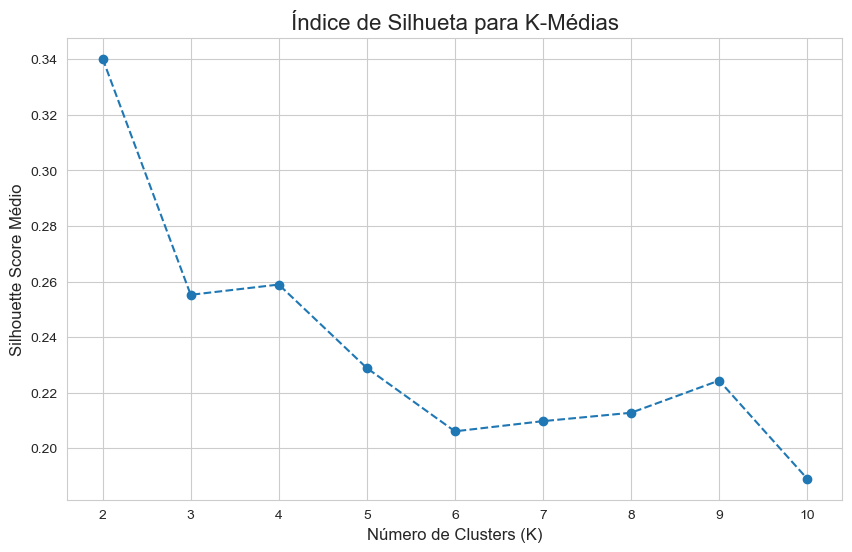

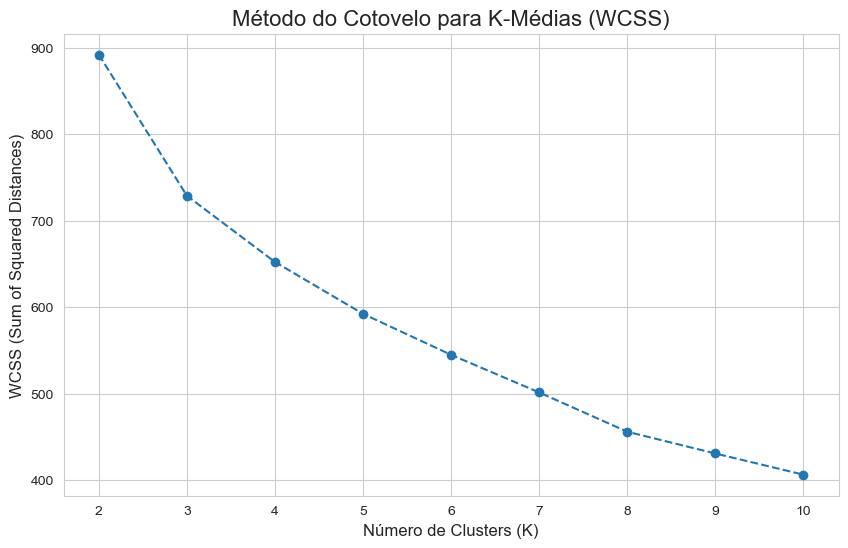

O número ótimo de clusters (K) para K-Médias, baseado no maior Silhouette Score, é: 2

Primeiras linhas do DataFrame com os rótulos de cluster K-Médias (K=2):
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  KMeans_Cluster  
0       9.44        56.2       5.82    553               0  
1       4.49        76.3       1.65   4090               1  
2      16.10        76.5       2.89   4460               1  
3      22.40        60.1       6.16   3530               0  
4       1.44        76.8       2.13  12200               1  

Países removidos devido a NaN's na coluna

C:\Users\alexa\anaconda3\envs\projeto_clusterizacao\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# DataFrame original para garantir que o processo seja completo e capturemos os NaN's introduzidos pela log-transform
df_original_for_processing = df.copy()

# Separar coluna de país
country_names = df_original_for_processing['country']
df_numeric_temp = df_original_for_processing.drop('country', axis=1)

# Aplicação da Transformação Logarítmica (np.log1p)
columns_to_log_transform = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'total_fer', 'gdpp']
df_log_transformed = df_numeric_temp.copy()

for col in columns_to_log_transform:
    df_log_transformed[col] = np.log1p(df_log_transformed[col])

# --- TRATAMENTO DOS NAN'S INTRODUZIDOS ---
# Identificar e remover as linhas com NaN's que foram introduzidos pela log-transform
initial_rows = df_log_transformed.shape[0]
df_log_transformed_cleaned = df_log_transformed.dropna()
rows_removed = initial_rows - df_log_transformed_cleaned.shape[0]

# Atualizar os nomes dos países para corresponder aos dados limpos
country_names_cleaned = country_names.loc[df_log_transformed_cleaned.index]

print(f"Foram removidas {rows_removed} linhas devido a valores NaN introduzidos pela transformação logarítmica (provavelmente 'inflation' <= -1).")
print(f"Dataset agora tem {df_log_transformed_cleaned.shape[0]} linhas após a limpeza.")

# Aplicação da Padronização (StandardScaler) nos dados limpos
scaler = StandardScaler()
X = scaler.fit_transform(df_log_transformed_cleaned)

# Converter o array numpy resultante de volta para um DataFrame para manter os nomes das colunas
df_scaled = pd.DataFrame(X, columns=df_log_transformed_cleaned.columns)

print("\nDataset após limpeza de NaN's e padronização (primeiras 5 linhas):")
print(df_scaled.head())

# K-Means
range_n_clusters = list(range(2, 11))

silhouette_scores = []
wcss = []

for n_clusters in range_n_clusters:
    # Inicializar o K-Means com o número de clusters atual
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled) # Usar df_scaled, que agora está limpo

    # Calcular o Silhouette Score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Calcular o WCSS
    wcss.append(kmeans.inertia_)

    print(f"Para n_clusters = {n_clusters}, o Silhouette Score médio é: {silhouette_avg:.4f}")

# Plotar os resultados do Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Índice de Silhueta para K-Médias', fontsize=16)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score Médio', fontsize=12)
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Plotar o método do Cotovelo para comparação
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo para K-Médias (WCSS)', fontsize=16)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Sum of Squared Distances)', fontsize=12)
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Encontrar o número de clusters com o maior Silhouette Score
optimal_k_silhouette = range_n_clusters[np.argmax(silhouette_scores)]
print(f"O número ótimo de clusters (K) para K-Médias, baseado no maior Silhouette Score, é: {optimal_k_silhouette}")

# Re-treinar o K-Means com o número ótimo de clusters para obter os rótulos finais
kmeans_optimal = KMeans(n_clusters=optimal_k_silhouette, random_state=42, n_init=10)
final_kmeans_labels = kmeans_optimal.fit_predict(df_scaled)

# Adicionar os rótulos de cluster ao DataFrame original limpo (para análise posterior)
# Usar df_original_for_processing, mas com o índice correto dos dados limpos
df_clustered_kmeans = df_original_for_processing.loc[country_names_cleaned.index].copy()
df_clustered_kmeans['KMeans_Cluster'] = final_kmeans_labels

print(f"\nPrimeiras linhas do DataFrame com os rótulos de cluster K-Médias (K={optimal_k_silhouette}):")
print(df_clustered_kmeans.head())

# Exibir os países removidos (se houver)
if rows_removed > 0:
    removed_countries_idx = set(df_log_transformed.index) - set(df_log_transformed_cleaned.index)
    removed_countries = df_original_for_processing.loc[list(removed_countries_idx), 'country'].tolist()
    print(f"\nPaíses removidos devido a NaN's na coluna 'inflation' (valores <= -1): {removed_countries}")

Número de dimensões do dataset: 9
Valor inicial sugerido para min_samples: 18


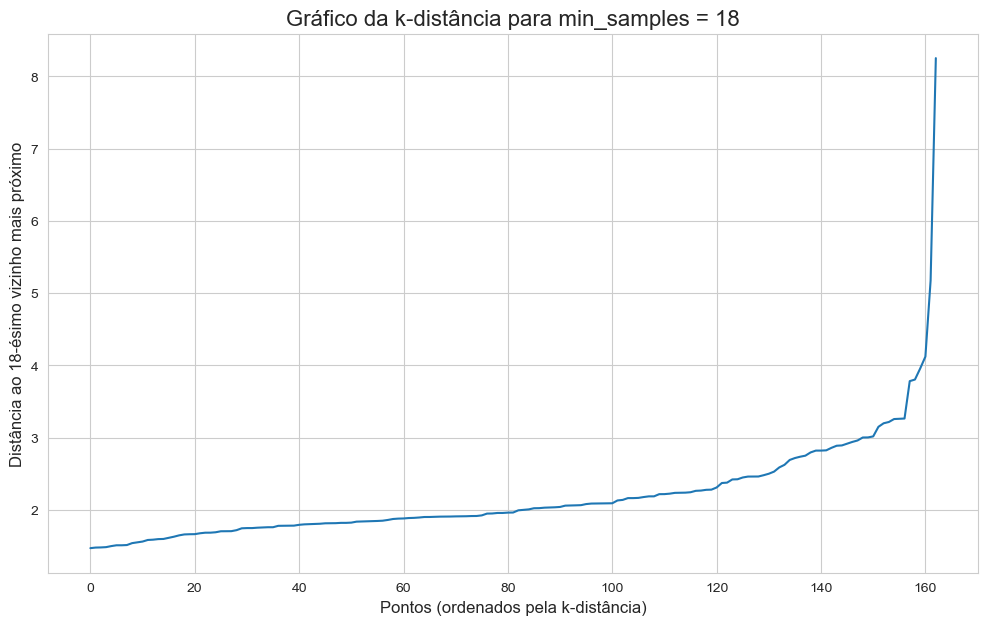


*** Análise do Gráfico de k-distância ***
Procure por um 'cotovelo' acentuado no gráfico. O valor da distância nesse ponto é um bom candidato para 'eps'.
Baseado no gráfico, você precisará inspecionar visualmente para sugerir um valor para 'eps'.


In [8]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Usaremos df_scaled, que contém os dados limpos e padronizados (163 linhas)
X_dbscan = df_scaled.copy()

# 1. Escolha de min_samples
min_samples_val = 2 * X_dbscan.shape[1]
print(f"Número de dimensões do dataset: {X_dbscan.shape[1]}")
print(f"Valor inicial sugerido para min_samples: {min_samples_val}")

# 2. Cálculo das distâncias k-Neighbor para determinar eps
neighbors = NearestNeighbors(n_neighbors=min_samples_val, metric='euclidean')
neighbors_fit = neighbors.fit(X_dbscan)
distances, indices = neighbors_fit.kneighbors(X_dbscan)

# Ordenar as distâncias ao k-ésimo vizinho
distances = np.sort(distances[:, min_samples_val-1], axis=0) # Pega a distância ao k-ésimo vizinho (o último da lista)

# 3. Plotar o gráfico da k-distância
plt.figure(figsize=(12, 7))
plt.plot(distances)
plt.title(f'Gráfico da k-distância para min_samples = {min_samples_val}', fontsize=16)
plt.xlabel('Pontos (ordenados pela k-distância)', fontsize=12)
plt.ylabel(f'Distância ao {min_samples_val}-ésimo vizinho mais próximo', fontsize=12)
plt.grid(True)
plt.show()

print("\n*** Análise do Gráfico de k-distância ***")
print(f"Procure por um 'cotovelo' acentuado no gráfico. O valor da distância nesse ponto é um bom candidato para 'eps'.")
print(f"Baseado no gráfico, você precisará inspecionar visualmente para sugerir um valor para 'eps'.")

In [9]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score # Importar para calcular Silhouette Score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Usaremos df_scaled, que contém os dados limpos e padronizados (163 linhas)
X_dbscan = df_scaled.copy()

# Parâmetros definidos
min_samples_val = 18 # min_samples = 2 * número de dimensões (9*2=18)
eps_val = 2.8        # Valor identificado no gráfico da k-distância

print(f"Aplicando DBSCAN com eps={eps_val} e min_samples={min_samples_val}...")

# Aplicação do DBSCAN
dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
dbscan_labels = dbscan.fit_predict(X_dbscan)

# Análise dos resultados do DBSCAN
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0) # Exclui o ruído (-1)
n_noise = list(dbscan_labels).count(-1)

print(f"\nResultados do DBSCAN:")
print(f"Número de clusters encontrados (excluindo ruído): {n_clusters}")
print(f"Número de pontos de ruído: {n_noise}")

# Calcular Silhouette Score se houver mais de um cluster (além do ruído)
if n_clusters > 1:
    # A métrica Silhouette Score não deve incluir pontos de ruído.
    # Filtrar os pontos que não são ruído para o cálculo do Silhouette Score.
    # Caso contrário, o Silhouette Score pode ser enganoso se o ruído for muito grande.
    core_samples_mask = dbscan_labels != -1
    silhouette_dbscan = silhouette_score(X_dbscan[core_samples_mask], dbscan_labels[core_samples_mask])
    print(f"Silhouette Score para DBSCAN (apenas pontos não-ruído): {silhouette_dbscan:.4f}")
elif n_clusters == 1:
    print("Foi encontrado apenas 1 cluster (excluindo ruído). O Silhouette Score não é aplicável para 1 cluster.")
else:
    print("Nenhum cluster foi encontrado (apenas ruído ou 0 clusters). O Silhouette Score não é aplicável.")

# Adicionar os rótulos de cluster ao DataFrame original limpo
df_clustered_dbscan = df_original_for_processing.loc[country_names_cleaned.index].copy()
df_clustered_dbscan['DBSCAN_Cluster'] = dbscan_labels

print(f"\nPrimeiras linhas do DataFrame com os rótulos de cluster DBSCAN (eps={eps_val}):")
print(df_clustered_dbscan.head())

# Contagem de membros por cluster
print("\nContagem de países por cluster DBSCAN:")
print(df_clustered_dbscan['DBSCAN_Cluster'].value_counts().sort_index())

Aplicando DBSCAN com eps=2.8 e min_samples=18...

Resultados do DBSCAN:
Número de clusters encontrados (excluindo ruído): 1
Número de pontos de ruído: 5
Foi encontrado apenas 1 cluster (excluindo ruído). O Silhouette Score não é aplicável para 1 cluster.

Primeiras linhas do DataFrame com os rótulos de cluster DBSCAN (eps=2.8):
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  DBSCAN_Cluster  
0       9.44        56.2       5.82    553               0  
1       4.49        76.3       1.65   4090               0  
2      16.10        76.5       2.89   4460            

In [10]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN # Importar novamente para garantir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Usaremos o df_scaled (limpo e padronizado)
X_metrics = df_scaled.copy()

# ==============================================================================
# 1. Avaliação do K-Médias (com K=2, que foi o ótimo pela Silhueta)
# ==============================================================================
print("====== Avaliando K-Médias (K=2) ======")
optimal_k_kmeans = 2 # Nosso K ótimo identificado pelo Silhouette Score

# Re-treinar K-Means com K=2 para obter os labels
kmeans_optimal_model = KMeans(n_clusters=optimal_k_kmeans, random_state=42, n_init=10)
kmeans_labels = kmeans_optimal_model.fit_predict(X_metrics)

# Calcular o Silhouette Score (já tínhamos, mas para comparação direta)
silhouette_kmeans = silhouette_score(X_metrics, kmeans_labels)
print(f"Silhouette Score para K-Médias (K={optimal_k_kmeans}): {silhouette_kmeans:.4f}")

# Calcular Calinski-Harabasz Score
calinski_harabasz_kmeans = calinski_harabasz_score(X_metrics, kmeans_labels)
print(f"Calinski-Harabasz Score para K-Médias (K={optimal_k_kmeans}): {calinski_harabasz_kmeans:.4f}")

# Calcular Davies-Bouldin Score
davies_bouldin_kmeans = davies_bouldin_score(X_metrics, kmeans_labels)
print(f"Davies-Bouldin Score para K-Médias (K={optimal_k_kmeans}): {davies_bouldin_kmeans:.4f}")

# ==============================================================================
# 2. Avaliação do DBSCAN (com os parâmetros que resultaram em 1 cluster e ruído)
# ==============================================================================
print("\n====== Avaliando DBSCAN ======")
# Parâmetros usados para o DBSCAN
eps_dbscan = 2.8
min_samples_dbscan = 18

dbscan_model = DBSCAN(eps=eps_dbscan, min_samples=min_samples_dbscan)
dbscan_labels = dbscan_model.fit_predict(X_metrics)

# Filtrar pontos de ruído para cálculo de métricas que não os consideram
core_samples_mask = dbscan_labels != -1
n_clusters_dbscan = len(set(dbscan_labels[core_samples_mask])) # Contar clusters sem ruído

print(f"DBSCAN - Número de clusters encontrados (excluindo ruído): {n_clusters_dbscan}")
print(f"DBSCAN - Número de pontos de ruído: {list(dbscan_labels).count(-1)}")

if n_clusters_dbscan >= 2: # As métricas exigem pelo menos 2 clusters
    # Silhouette Score (já tínhamos a lógica para filtrar ruído)
    silhouette_dbscan = silhouette_score(X_metrics[core_samples_mask], dbscan_labels[core_samples_mask])
    print(f"Silhouette Score para DBSCAN: {silhouette_dbscan:.4f}")

    # Calinski-Harabasz Score
    calinski_harabasz_dbscan = calinski_harabasz_score(X_metrics[core_samples_mask], dbscan_labels[core_samples_mask])
    print(f"Calinski-Harabasz Score para DBSCAN: {calinski_harabasz_dbscan:.4f}")

    # Davies-Bouldin Score
    davies_bouldin_dbscan = davies_bouldin_score(X_metrics[core_samples_mask], dbscan_labels[core_samples_mask])
    print(f"Davies-Bouldin Score para DBSCAN: {davies_bouldin_dbscan:.4f}")
else:
    print("Não é possível calcular Calinski-Harabasz e Davies-Bouldin para DBSCAN pois não há pelo menos 2 clusters (além do ruído).")


====== Avaliando K-Médias (K=2) ======
Silhouette Score para K-Médias (K=2): 0.3402
Calinski-Harabasz Score para K-Médias (K=2): 103.7844
Davies-Bouldin Score para K-Médias (K=2): 1.1405

====== Avaliando DBSCAN ======
DBSCAN - Número de clusters encontrados (excluindo ruído): 1
DBSCAN - Número de pontos de ruído: 5
Não é possível calcular Calinski-Harabasz e Davies-Bouldin para DBSCAN pois não há pelo menos 2 clusters (além do ruído).


C:\Users\alexa\anaconda3\envs\projeto_clusterizacao\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
